# Week 4 assignment

### Prep

In [2]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import reciprocal, uniform 
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

X, y = make_moons(n_samples=10000, noise=0.4, random_state=np.random.seed(42)) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree

In [52]:
def decision_tree(x,y,x2,y2): #Xtrain,ytrain,xtest,ytest
    """Modified to run as a function. Takes the inputs of the train and test of moons and runs the decision tree.
    
        Afterwards outputs the accuracy,mean square error, precision,recall and AUC score, as well as plotting
        the curves """
    params = {'max_leaf_nodes': list(range(2, 35)), 'min_samples_split': [2,3,4]} #reduced range to where the results aren't skewed against it.
    gs = GridSearchCV(DecisionTreeClassifier(random_state=np.random.seed(42)), params, n_jobs=-1, verbose=1, cv=10)
    gs.fit(x,y) 
    gs.best_estimator_ 
    y_pred = gs.predict(x2) 
    print("Decision Tree Accuracy:",accuracy_score(y2, y_pred))
    print("Decision Tree MSE:",mean_squared_error(y2, y_pred))
    print("Decision Tree Precision",precision_score(y2, y_pred))
    print("Decision Tree Recall",recall_score(y2, y_pred))
    print("Decision Tree AUC",roc_auc_score(y2, y_pred))
    precision,recall,threshold = precision_recall_curve(y2,y_pred)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(recall, precision, marker='.', label='Precision Recall Curve')
    plt.xlabel('Recall-->')
    plt.ylabel('Precision-->')
    plt.legend()
    plt.show()
    fpr,tpr,threshhold = roc_curve(y_test,y_pred)
    auc_logistic = auc(fpr,tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(fpr, tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()

### SVM

In [54]:
def svm(x,y,x2,y2): #Xtrain,ytrain,xtest,ytest
    """Modified to run as a function. Takes the inputs of the train and test of moons and runs the SVM.
        Cross validation changed from 3 to 10 and verbose changed to 1 to tidy up output. Added n_jobs to allow processing faster.
        Afterwards outputs the accuracy,mean square error, precision,recall and AUC score, as well as plotting
        the curves """
    lin_clf = LinearSVC(random_state=42) 
    lin_clf.fit(x,y) 
    y_pred = lin_clf.predict(x)
    scaler = StandardScaler() 
    X_train_scaled = scaler.fit_transform(x.astype(np.float32)) 
    X_test_scaled = scaler.transform(x2.astype(np.float32)) 
    param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)} 
    svm_clf = SVC(decision_function_shape="ovr", gamma="auto")
    #Changed Verbose to 1 to not show each iteration,changed interations to 294 and cv to 10 to have the same amount of fits.
    rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions,n_jobs = -1, n_iter=99, verbose=1, cv=10)
    rnd_search_cv.fit(X_train_scaled[:10000], y_train[:10000]) 
    rnd_search_cv.best_estimator_ 
    rnd_search_cv.best_score_ 
    y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled) 
    print("SVM Accuracy:",accuracy_score(y2, y_pred))
    print("SVM MSE:",mean_squared_error(y2, y_pred))
    print("SVM Precision",precision_score(y2, y_pred))
    print("SVM Recall",recall_score(y2, y_pred))    
    print("SVM AUC",roc_auc_score(y2, y_pred)) 
    precision,recall,threshold = precision_recall_curve(y2,y_pred)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(recall, precision, marker='.', label='Precision Recall Curve')
    plt.xlabel('Recall -->')
    plt.ylabel('Precision -->')
    plt.legend()
    plt.show()
    fpr,tpr,threshhold = roc_curve(y_test,y_pred)
    auc_logistic = auc(fpr,tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(fpr, tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()

## Tree comparisons

Fitting 10 folds for each of 99 candidates, totalling 990 fits
Decision Tree Accuracy: 0.8735
Decision Tree MSE: 0.1265
Decision Tree Precision 0.8633663366336634
Decision Tree Recall 0.8834853090172239
Decision Tree AUC 0.8736281431561934


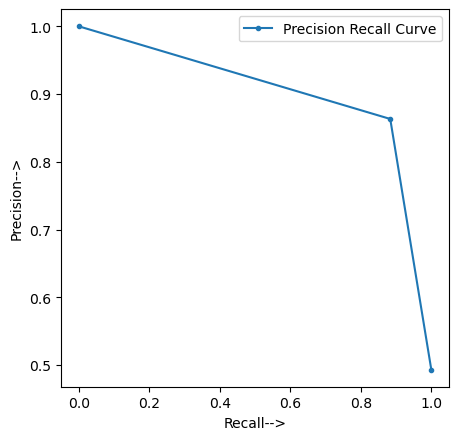

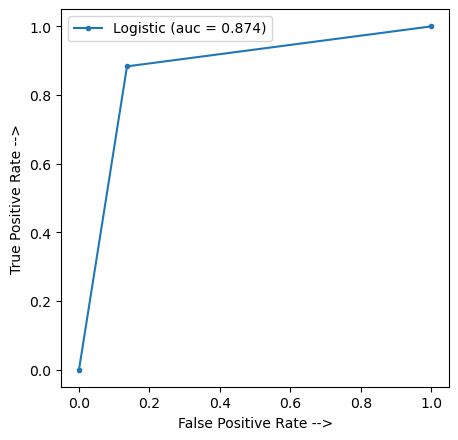

Fitting 10 folds for each of 99 candidates, totalling 990 fits
SVM Accuracy: 0.8675
SVM MSE: 0.1325
SVM Precision 0.8639112903225806
SVM Recall 0.8682877406281662
SVM AUC 0.8675101092084563


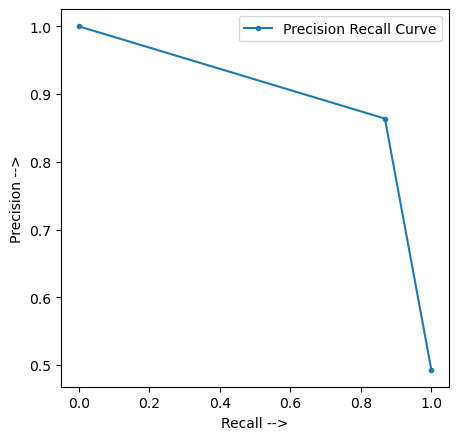

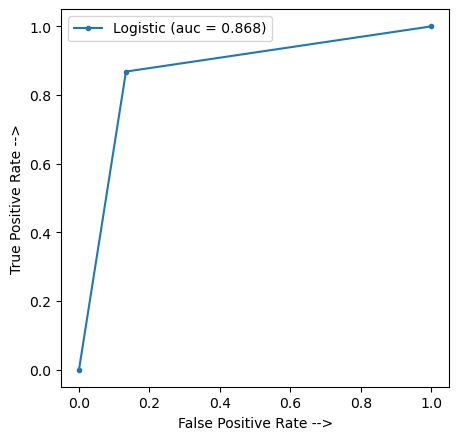

In [55]:
decision_tree(X_train,y_train, X_test, y_test)
svm(X_train,y_train, X_test, y_test)